In [ ]:
from langchain.llms import OpenAI

In [ ]:
import openai
#import os

#from dotenv import load_dotenv, find_dotenv
#_ = load_dotenv(find_dotenv()) # read local .env file

#openai.api_key  = 'os.getenv('OPENAI_API_KEY')
#openai.api_key  ='...'

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.chains import create_extraction_chain, create_extraction_chain_pydantic
from langchain.prompts import ChatPromptTemplate

In [ ]:
llm = ChatOpenAI(temperature=0, model="gpt-3.5-turbo-0613", openai_api_key="...")

In [101]:
## Reading the excel file
import io
import pandas as pd

df = pd.read_excel('LearnLab Summer School Proj Dataset.xlsx', index_col=0, sheet_name='list of video')

In [102]:
df

,Name of the Academy,Subscribers,Topic Name,Video Name,Link to the Tutorial Video,Transcript of the Video,Time gaps,GPT attributes (Video Schema Code),GPT attributes (Question Schema Code),GPT attributes (Pause Schema),...,Entertaining content presence,Video Mode,Teaching styles,Count of worked out examples,Count of Questions asked to viewers,Count of KC covered,Order of the KC covered,Pauses for student/viewer reflection,Count of formulas explained,Mention of real life applications
Index,,,,,,,,,,,,,,,,,,,,,
1,Study.com,NaN,Geometry Area,Geometry: Finding the Area of Various Shapes,https://study.com/academy/lesson/area-real-wor...,Learn to define the area of two-dimensional ge...,NaN,1 {'video_topic': 'area of two-dimensional geo...,[{'question topic': 'area of two-dimensional g...,NaN,...,False,Serious,"step by step explanation, example",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,mathantics,2960000,Geometry Area,Math Antics - Area,https://www.youtube.com/watch?v=xCdxURXMdFY,"0:07\nHi, welcome to Math Antics.\n0:08\nIn ou...","[1.0, 7.0, 3.0, 6.0, 6.0, 6.0, 5.0, 4.0, 6.0, ...","2 {'video_topic': 'area', 'skills_covered': 'c...","[{'question topic': '2-dimensional shapes',\n ...",NaN,...,False,Serious,explaining concepts,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Khan Academy,7940000,Geometry Area,"Perimeter and area: the basics | Perimeter, ar...",https://www.youtube.com/watch?v=LoaBd-sPzkU,0:00\nWhat I want to do in this video is a fai...,"[2.0, 5.0, 2.0, 2.0, 2.0, 3.0, 3.0, 1.0, 2.0, ...",3 {'video_topic': 'primer on perimeter and are...,"[{'question topic': 'perimeter',\n 'skill cov...",NaN,...,False,Serious,"step by step explanation, providing examples",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABCmouse.com Early Learning Academy,1200000,Word problems,"""Jessie Solving Word Problems"" by ABCmouse.com",https://www.youtube.com/watch?v=s3jP0vnFSxE,0:04\noh what are you wearing hank my new swim...,"[3.0, 3.0, 2.0, 1.0, 4.0, 3.0, 4.0, 2.0, 3.0, ...","4 {'video_topic': 'solving word problems', 'sk...","[{'question topic': 'swim trunks', 'skill cov...",[{'start_time_of_pause_for_reflection': '0:04'...,...,True,Not Serious,"step by step explanation, example",NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,mathOgenius,NaN,Word problems,How To Solve Word Problems of Any Kind . Nutsh...,https://www.youtube.com/watch?v=ON7i6Z1a4no,0:00\nword problems generally refers to the\n0...,"[2.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, ...","5 {'video_topic': 'word problems', 'skills_cov...","[{'question topic': 'word problems', 'skill c...",NaN,...,False,Serious,"step by step explanation, providing examples",NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Elliott McCarthy,5280,conversion of units,Shortcut for Metric Unit Conversion,https://www.youtube.com/watch?v=R00HJXPtEGE,0:00\nokay so for this one we are talking\n0:0...,"[2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 1.0, 2.0, ...",6 {'video_topic': 'converting between metric u...,[{'question topic': 'converting between metric...,NaN,...,True,Not Serious,sing a mnemonic device,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,chemistNATE,247000,conversion of units,How to Convert mL to moles (Volume to Moles),https://www.youtube.com/watch?v=pRhf-RMWZgg,0:00\nhow do you convert volume maybe in\n0:04...,"[4.0, 4.0, 3.0, 3.0, 5.0, 2.0, 5.0, 3.0, 4.0, ...",7 {'video_topic': 'converting volume to moles'...,[{'question topic': 'conversion of volume to m...,NaN,...,False,Serious,"step by step explanation, example",NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Cowan Academy,78200,Two step equation .,Method of Elimination Steps to Solve Simultane...,https://www.youtube.com/watch?v=d6vyYvx8URw,0:00\nhey guys the aim of this video is his\n0...,"[2.0, 1.0, 4.0, 1.0, 2.0, 3.0, 2.0, 2.0, 3.0, ...","8 {'video_topic': 'method of elimination', 'sk...","[{'question topic': 'method of elimination', ...",NaN,...,False,Serious,"step by step explanation, example",NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Khan Academy,"7.940,000",Two step equation .,Example: two-step equation with numerator x | ...,https://www.youtube.com/watch?v=p5e5mf_G3FI,

In [ ]:
schema = {
    "properties": {
        "name": {"type": "string"},
        "height": {"type": "integer"},
        "hair_color": {"type": "string"},
    },
    "required": ["name", "height"],
}

schema = {
"properties": {
"topic": {"type": "string"},
"examples_explained": {"type": "string"},
"questions_asked": {"type": "string"},
"skills_covered": {"type": "string"},
"start_time_of_skill": {"type": "string"},
"end_time_of_skill": {"type": "string"},
"Formula_explained":{"type": "string"}
}
}



In [ ]:
inp = """
Alex is 5 feet tall. Claudia is 1 feet taller Alex and jumps higher than him. Claudia is a brunette and Alex is blonde.
        """

In [34]:
video_trans=f"""
0:03
hi I'm Janice I teach science here in
0:06
Clearwater Florida and today I'm here to
0:08
talk to you about how you make metric
0:10
conversions for chemistry now in the
Metric System
0:13
field of science we use the metric
0:16
system for measurement and the reason
0:19
for that is that we have scientists all
0:21
over the world and they want to be able
0:22
to communicate with each other so they
0:24
need a common language to speak in and
0:26
so the metric system is the common
0:27
language of measurement when we're
0:29
talking about science but when you're
0:31
doing a lot of chemistry problems maybe
0:33
stoichiometry problems trying to figure
0:35
out how many grams of this you would
0:36
need to make so many grams of that you
0:39
sometimes need to do conversions so for
Metric Conversions
0:42
instance if they gave me an answer in
0:45
milliliters or an amount in milliliters
0:48
and they wanted to know how many liters
0:50
I would have to do a metric conversion
0:52
or maybe they gave me milligrams and
0:55
they wanted to know how many grams that
0:57
was so to do the metric conversion you
1:00
have to look at what you're converting
1:02
from and what you're going to so for
1:04
instance when I'm dealing with
1:05
milliliters to liters which is a pretty
1:08
typical conversion or milligrams to
1:10
grams also pretty typical I have to look
1:12
at that letter right there because
1:15
that's going to tell me what my factor
1:17
of 10 is going to be the metric system
1:19
is all based on powers of 10 and so
1:22
that's great because doing metric
1:25
conversions really only involves moving
1:27
a decimal place because you're just
1:28
dividing by 10 so one liter actually
1:33
equals a thousand milligrams the prefix
1:40
milli means a thousand so let's say that
1:43
I had oh I don't know 250 milligrams and
1:49
I wanted to know how many liters that
1:52
was well what I would have to do is I
1:57
would have to divide by a thousand now
2:00
my decimal place would be right here
2:02
well when I divide by a thousand there's
2:05
two ways I can do it I can you know set
2:07
it up with the zeros cross out the zeros
2:09
I can punch it into a cow
2:10
later or I can just move my decimal
2:12
place so if it's a thousand and I'm
2:15
dividing by that's three powers of ten
2:17
so I'm going to move my decimal place
2:19
one two three places so 250 milligrams
2:25
would actually equal point two five zero
2:29
liters now if you had centigrams senti
2:33
equals 100 you would only be moving it
2:36
two decimal places so metric conversions
2:40
are going to be based on what you're
2:41
converting from to what you're
2:42
converting to and you'll need to know
2:44
what each of the different prefixes
2:46
means so that you know how many places
2:48
you're going to have to move your
2:49
decimal place so that's how you make
2:51
metric conversions in chemistry I'm
2:53
Janice
2:54
have a great day
"""

In [38]:
video_schema = {
"properties": {
    "video_topic": {"type": "string"},
    "skills_covered": {"type": "string"},
    "style_of_teaching": {"type": "string"},
    "pauses_for_reflection": {"type": "boolean"},
    "unanswered_question_for_viewers_reflection": {"type": "boolean"},
    "entertaining content irrelevant to video topic": {"type": "boolean"}

}
}


In [44]:
question_schema = {
"properties": {
"question topic": {"type": "string"},
"skill covered in question": {"type": "string"},
"complete question": {"type": "string"},
"related sentences required to answer the question": {"type": "string"},
"solution to complete question": {"type": "string"},
"start time of question": {"type": "string"},
"end time of question": {"type": "string"}
}
}

In [45]:
chain = create_extraction_chain(question_schema, llm)
#chain = create_extraction_chain(video_schema, llm)
#chain = create_extraction_chain(quiz_schema, llm)



In [40]:
chain.run(video_trans)

{'video_topic': 'metric conversions for chemistry',
 'skills_covered': 'making metric conversions, understanding the metric system, using prefixes in metric conversions',
 'style_of_teaching': 'explaining the concept and providing examples',
 'pauses_for_reflection': False,
 'unanswered_question_for_viewers_reflection': False,
 'entertaining content irrelevant to video topic': False}

In [47]:
for index, row in df.iterrows():
    if index == 2:
        continue
    video_trans = row['Transcript of the Video']
    generated_output = chain.run(video_trans)
    print(index, generated_output)
        #break

1 [{'question topic': 'area of two-dimensional geometric shapes', 'skill covered in question': 'calculate area', 'complete question': 'What is the area formula for geometric shapes?', 'related sentences required to answer the question': 'To find the area of a square or rectangle, multiply the length times the width. To find the area of a circle, multiply pi times the radius squared. To find the area of a triangle, multiply one-half the base times the height.', 'solution to complete question': 'Area of square or rectangle: length * width, Area of circle: pi * radius^2, Area of triangle: 1/2 * base * height', 'start time of question': '', 'end time of question': ''}]


JSONDecodeError: Unterminated string starting at: line 34 column 60 (char 3708)

In [135]:
## Gathering interval timestamps ; work not completed during summer school
import re
from datetime import datetime

def gather_timestamps(transcript):
    time_gap = []
    #timestamps = []
    prev_time = ""
    cur_time = ""
    start = 0
    for line in transcript.splitlines():
        if ":" in line and re.match('\d{1,2}:\d{1,2}', line):
            if start == 0:
                prev_time = datetime.strptime(line, "%M:%S")
                start = 1
                #print(line)
            else:
                cur_time = datetime.strptime(line, "%M:%S")
                time_difference = cur_time - prev_time
                prev_time = cur_time
                if time_difference.total_seconds() > 3:
                    #print(time_difference.total_seconds())
                    time_gap.append(time_difference.total_seconds())#print(time_difference)
            #timestamps.append(line)
    #print(timestamps)
    return time_gap
    #print(time_gap)


In [133]:
for index, row in df.iterrows():
    if index < 10:
        continue
    video_trans = row['Transcript of the Video']
    print(index)
    gather_timestamps(video_trans)
    #break

10
[5.0, 5.0, 4.0, 6.0, 4.0, 7.0, 6.0, 5.0, 4.0, 4.0, 4.0, 6.0, 6.0, 6.0, 5.0]
11
[8.0, 4.0, 12.0, 4.0, 4.0, 4.0, 7.0, 4.0, 4.0, 5.0, 4.0, 4.0, 4.0, 5.0, 4.0, 4.0, 4.0, 4.0, 6.0, 4.0, 6.0, 4.0, 5.0, 4.0, 5.0, 4.0, 4.0, 4.0, 6.0]
12
[5.0, 7.0, 6.0, 5.0, 6.0, 4.0, 4.0, 4.0]


In [ ]:
#!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


for index, row in df.iterrows():
    if index == 1:
        continue
    x_axis = np.arange(0, 200)
    video_trans = row['Transcript of the Video']
    y_axis = gather_timestamps(video_trans)
    y_axis=np.concatenate([y_axis, np.zeros(len(x_axis)-len(y_axis))])
    col = 'b'
    if row['Entertaining content presence'] == True:
        col = 'r'
    print(col)
    plt.plot(x_axis, y_axis, color=col, label=row['Video Mode'])



#plt.plot(x_axis, y_axis)
plt.title('Paused duration')
plt.xlabel('time marks')
plt.ylabel('intervals in sec')
plt.show()

200
200
200


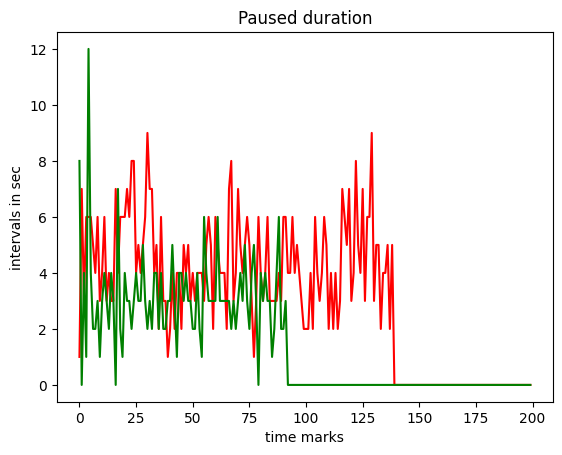

In [118]:
x_axis = np.arange(0, 200)

y_axis_1 = [1.0, 7.0, 3.0, 6.0, 6.0, 6.0, 5.0, 4.0, 6.0, 3.0, 4.0, 6.0, 3.0, 4.0, 3.0, 3.0, 7.0, 4.0, 6.0, 6.0, 6.0, 7.0, 6.0, 8.0, 8.0, 4.0, 5.0, 4.0, 5.0, 6.0, 9.0, 7.0, 7.0, 4.0, 5.0, 2.0, 6.0, 3.0, 3.0, 1.0, 2.0, 4.0, 2.0, 4.0, 4.0, 2.0, 5.0, 4.0, 5.0, 3.0, 4.0, 3.0, 4.0, 4.0, 4.0, 3.0, 5.0, 6.0, 5.0, 2.0, 6.0, 5.0, 4.0, 4.0, 4.0, 2.0, 7.0, 8.0, 3.0, 4.0, 7.0, 5.0, 4.0, 5.0, 6.0, 5.0, 3.0, 1.0, 3.0, 6.0, 4.0, 3.0, 4.0, 6.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 6.0, 6.0, 4.0, 4.0, 6.0, 4.0, 5.0, 4.0, 3.0, 2.0, 2.0, 2.0, 4.0, 2.0, 6.0, 4.0, 3.0, 4.0, 6.0, 5.0, 2.0, 4.0, 2.0, 4.0, 2.0, 3.0, 7.0, 6.0, 5.0, 7.0, 3.0, 4.0, 8.0, 5.0, 4.0, 7.0, 3.0, 6.0, 6.0, 9.0, 3.0, 5.0, 5.0, 2.0, 4.0, 4.0, 5.0, 2.0, 5.0]
y_axis_1=np.concatenate([y_axis_1, np.zeros(len(x_axis)-len(y_axis_1))])
print(len(y_axis_1))
y_axis_2 = [8.0, 0.0, 4.0, 1.0, 12.0, 4.0, 2.0, 2.0, 3.0, 1.0, 3.0, 4.0, 3.0, 2.0, 4.0, 3.0, 0.0, 7.0, 2.0, 1.0, 4.0, 3.0, 3.0, 2.0, 3.0, 4.0, 3.0, 3.0, 5.0, 3.0, 2.0, 3.0, 2.0, 4.0, 4.0, 2.0, 4.0, 2.0, 2.0, 3.0, 3.0, 5.0, 3.0, 1.0, 4.0, 4.0, 3.0, 4.0, 3.0, 3.0, 2.0, 2.0, 4.0, 2.0, 1.0, 6.0, 4.0, 3.0, 3.0, 3.0, 3.0, 6.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 4.0, 3.0, 5.0, 3.0, 2.0, 4.0, 5.0, 3.0, 0.0, 4.0, 3.0, 4.0, 3.0, 3.0, 1.0, 2.0, 4.0, 6.0, 2.0, 2.0, 3.0]
y_axis_2=np.concatenate([y_axis_2, np.zeros(len(x_axis)-len(y_axis_2))])
print(len(y_axis_2))

print(len(x_axis))
plt.plot(x_axis, y_axis_1, color='r', label='c1')
plt.plot(x_axis, y_axis_2, color='g', label='c2')

plt.title('Paused duration')
plt.xlabel('time marks')
plt.ylabel('intervals in sec')
plt.show()

In [145]:
### Measuring Kappa

import sklearn.metrics
import numpy as np
data_dict= {}
with open('Coding.csv', mode='r') as f:
    lines = f.readlines()

    for line in lines:
        #print(line)
        line = line.strip('\n')
        key = line.split(',')[0]
        # values is a list
        values = line.split(',')[1:37] 

        data_dict[key] = values
print(len(data_dict['Ref TS']))

Ref XT,Agree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,,Disagree,Disagree,Disagree,Disagree,Agree,Agree,Agree,Agree,Agree,Agree,Agree

Ref TS,Agree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Agree,Disagree,Disagree,Disagree,Disagree,Agree,Agree,Agree,Disagree,Disagree,,Disagree,Disagree,Disagree,Disagree,Disagree,Agree,Disagree,Agree,Agree,Agree,Agree
36


In [ ]:
#!pip install -U scikit-learn scipy matplotlib


In [147]:
#c_matrix = sklearn.metrics.confusion_matrix(data_dict['Ref TS'],data_dict['Ref XT'], labels = ['Agree','Disagree'])
kappa_direct = sklearn.metrics.cohen_kappa_score(data_dict['Ref TS'],data_dict['Ref XT'])


In [148]:
kappa_direct

0.6